In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed('spearhead')

# Surpress SettingsWithCopyWarning Error
pd.options.mode.copy_on_write = True

In [2]:
ship_table = pd.read_csv('Modified_Irrigation.csv')
# ship_table.head(2)

In [3]:
ship_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
# Better Approach
# ship_table.dropna(inplace=True)
# ship_table.reset_index(drop=True, inplace=True)
adjusted_ship_dataset = ship_table.dropna()
adjusted_ship_dataset = adjusted_ship_dataset.reset_index(drop=True)

# adjusted_ship_dataset.info()
# adjusted_ship_dataset.columns
# adjusted_ship_dataset.corr(method='pearson', numeric_only=True)

In [5]:
feature1 = 'moisture'
feature2 = 'temp'

k_mean_df = adjusted_ship_dataset[[feature1, feature2]] 
# k_mean_df['n_centroid'] = np.nan

k_mean_df.tail()

,moisture,temp
195,941,13
196,902,45
197,894,42
198,1022,45
199,979,10


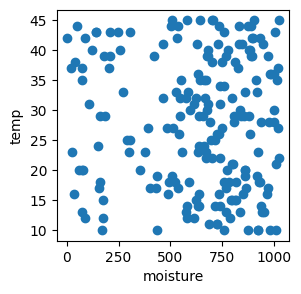

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2])
ax.set_ylabel(feature2)
ax.set_xlabel(feature1)
plt.show()

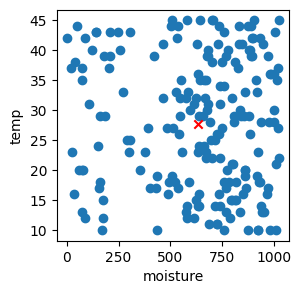

In [7]:
centroid = [k_mean_df[feature1].mean(), k_mean_df[feature2].mean()]
# print(centroid1)
# k = 1
fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(k_mean_df[feature1], k_mean_df[feature2])
ax.scatter(centroid[0], centroid[1], color='red', marker='x') 
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [8]:
def randompoint(feature):
  min = k_mean_df[feature].min()
  max = k_mean_df[feature].max()
  # print(min, max)
  return random.randint(min.astype(np.int64), max.astype(np.int64))

number_centroids = 2
centroids = np.array([[randompoint(feature1), randompoint(feature2)] for _ in range(number_centroids)])

print(centroids)

[[295  35]
 [253  12]]


In [9]:
distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
print(distances_centroids)

[[343.525836   385.02077866]
 [227.63567383 269.06690618]
 [446.18942166 488.10244826]
 [503.00894624 545.36684901]
 [395.06202045 437.29280808]
 [263.27362192 305.19829619]
 [283.93309071 325.        ]
 [378.         420.62929047]
 [347.14406231 390.3972336 ]
 [428.67236907 470.00106383]
 [376.19144063 418.14471179]
 [463.00107991 505.47898077]
 [212.23571801 256.13473017]
 [291.00687277 333.66150512]
 [408.12253062 451.20837758]
 [421.1187481  463.18246944]
 [429.67080422 471.00106157]
 [533.03377004 575.73083989]
 [338.21295067 380.15917719]
 [488.29601678 530.03396118]
 [340.00147059 382.75318418]
 [230.00869549 272.80945731]
 [341.17737322 383.18794344]
 [518.3859566  560.00803566]
 [441.09182717 484.05888072]
 [538.44962624 580.00086207]
 [513.03508652 555.26029932]
 [419.52592292 461.00433837]
 [511.04794296 553.23141632]
 [386.02072483 428.4215214 ]
 [366.         408.64777009]
 [251.01792765 293.68180059]
 [464.6730033  506.00395255]
 [508.19287677 550.07363143]
 [375.22526567

In [10]:
index_centroids = np.array([x.argmin() for x in distances_centroids])
# print(index_centroids)
k_mean_df['nearest_centroids'] = index_centroids 

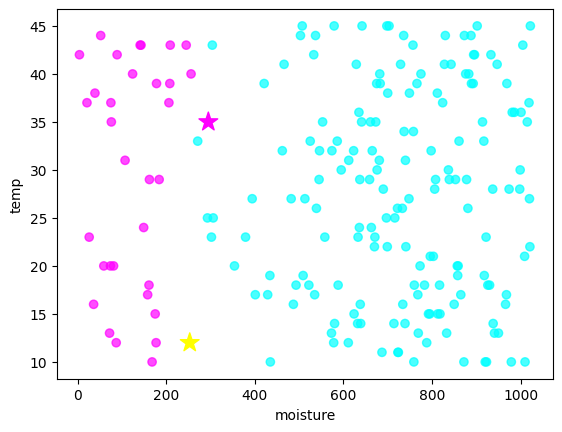

In [11]:
# print(centroids)

# BETTER SOLUTION
# fig, ax = plt.subplots(figsize=(8, 8))
fig, ax = plt.subplots()

# Datasets
ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)

# Centroids
centroid_x = centroids[:, 0]
centroid_y = centroids[:, 1]
colors = ['black', 'green', 'blue']
plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)


# plt.colorbar(ax)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
plt.show()

In [12]:
# NEW Centroids
new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
terminate = centroids.sum()

0


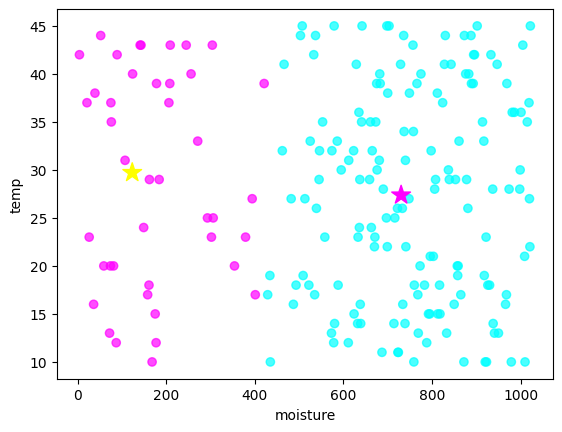

1


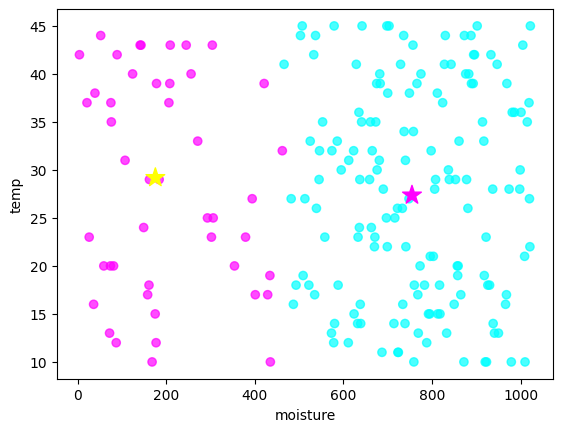

2


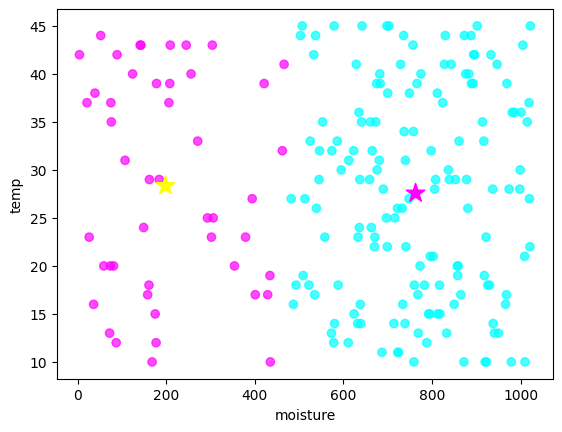

3


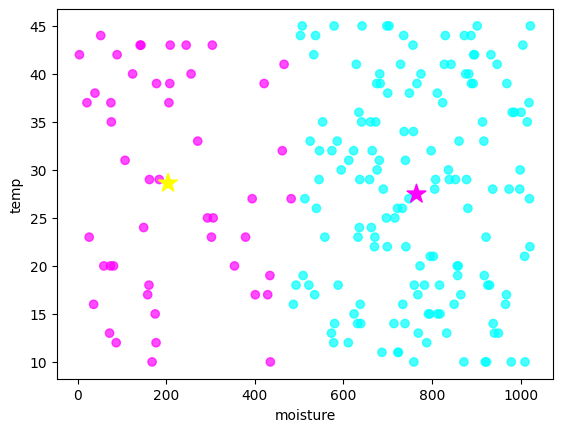

4


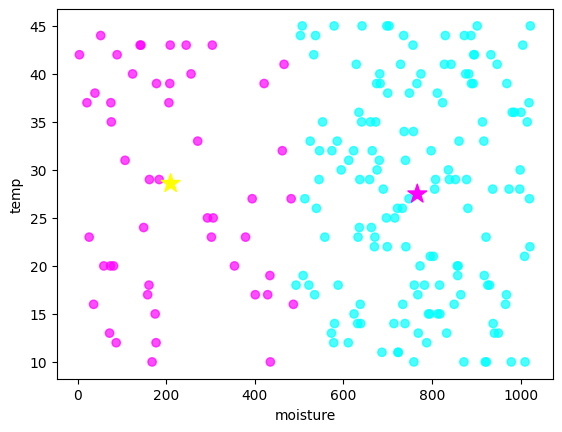

5


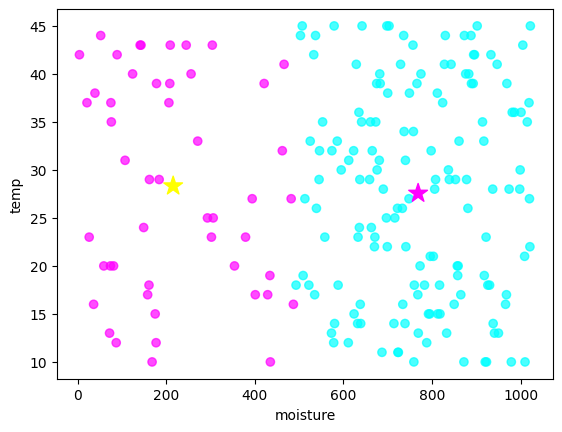

In [13]:
# termination criterion

itr = 0
while (True):
  print(itr)

  distances_centroids = np.array([[math.dist([k_mean_df.iloc[x][feature1], k_mean_df.iloc[x][feature2]], [centroid[0], centroid[1]]) for centroid in centroids] for x in range(k_mean_df.shape[0])])
  index_centroids = np.array([x.argmin() for x in distances_centroids])
  k_mean_df['nearest_centroids'] = index_centroids 

  # fig, ax = plt.subplots(figsize=(2,2))
  fig, ax = plt.subplots()
  # Datasets
  ax.scatter(k_mean_df[feature1], k_mean_df[feature2], c=k_mean_df['nearest_centroids'], cmap='cool', alpha=0.7)
  # Centroids
  centroid_x = centroids[:, 0]
  centroid_y = centroids[:, 1]
  plt.scatter(centroid_x, centroid_y, c=range(len(centroids)), cmap='spring', marker='*', s=200)

  ax.set_xlabel(feature1)
  ax.set_ylabel(feature2)
  plt.show()

  new_centroids = k_mean_df.groupby(by=['nearest_centroids']).mean()
  # print(new_centroids)
  centroids = np.array([[new_centroids.iloc[i][feature1], new_centroids.iloc[i][feature2]] for i in range(len(new_centroids))])
  # print(centroids)

  itr+=1
  if (math.floor(terminate) == math.floor(centroids.sum())):
    break

  terminate = centroids.sum()